# Analysis for figure 5

## Installations & Downloads

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pickle
import scipy
import pandas as pd
from scipy import stats
from scipy.stats import normaltest
import matplotlib as mpl
import itertools
from itertools import groupby

sys.path.append(os.path.abspath('../..'))

import warnings
warnings.simplefilter('ignore', pd.errors.DtypeWarning)
np.seterr(divide='ignore')
warnings.simplefilter("ignore")


import analysis.calc_single_cell_properties as calculator 
import analysis.utils as utils
import data_layer.utils as data_utils
from configuration import consts, params

In [3]:
fig_dir_path = fr"/storage/users/assafzar/Muscle_Differentiation_AvinoamLab/eps_figs/"

## data loading - differentiation scores dataframes

In [4]:
scores_df_s3 = data_utils.get_scores_df(scores_motility_path=consts.motility_model_path % (1,5) + fr"df_score_vid_num_S3.pkl",
                              scores_intensity_path=consts.intensity_model_path % (1,5) + fr"df_score_vid_num_S3.pkl")

scores_df_s2 = data_utils.get_scores_df(scores_motility_path=consts.motility_model_path % (1,5) + fr"df_score_vid_num_S2.pkl",
                              scores_intensity_path=consts.intensity_model_path % (1,5) + fr"df_score_vid_num_S2.pkl")

scores_df_s6 = data_utils.get_scores_df(scores_motility_path=consts.motility_model_path % (1,5) + fr"df_score_vid_num_S6.pkl",
                              scores_intensity_path=consts.intensity_model_path % (1,5) + fr"df_score_vid_num_S6.pkl")

scores_df_s8 = data_utils.get_scores_df(scores_motility_path=consts.motility_model_path % (1,5) + fr"df_score_vid_num_S8.pkl",
                              scores_intensity_path=consts.intensity_model_path % (1,5) + fr"df_score_vid_num_S8.pkl")

Calculate single cell properties

In [5]:
scores_df_s3 = calculator.get_properties(scores_df_s3, vid_name="S3", actin_vid_path=consts.vid_info_dict["3"]['actin_path'])
scores_df_s2 = calculator.get_properties(scores_df_s2, vid_name="S2", actin_vid_path=consts.vid_info_dict["2"]['actin_path'])
scores_df_s6 = calculator.get_properties(scores_df_s6, vid_name="S6", actin_vid_path=consts.vid_info_dict["6"]['actin_path'])
scores_df_s8 = calculator.get_properties(scores_df_s8, vid_name="S8", actin_vid_path=consts.vid_info_dict["8"]['actin_path'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


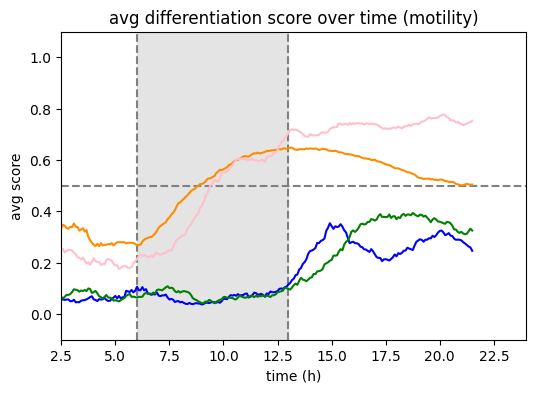

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

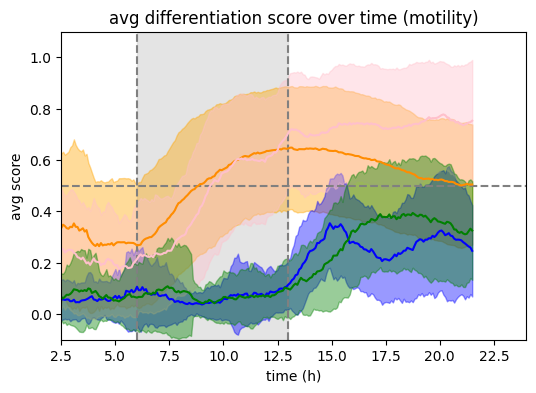

<Figure size 640x480 with 0 Axes>

In [11]:
data_2_3_test  = [(scores_df_s3, "ERKi", "DarkOrange","Orange"), (scores_df_s2, "DMSO", "blue", "blue"),
                  (scores_df_s6,  "P38i", "pink", "pink"), (scores_df_s8,  "ERKi-P38i", "green", "green")]

utils.plot_avg_conf(data_2_3_test, "motility", path=fig_dir_path + "avg diff over time train (1,5) test (2, 3, 6, 8) motility", plot_std=False, time=(6,13), xlim=(2.5, 24))
utils.plot_avg_conf(data_2_3_test, "motility", path=fig_dir_path + "avg diff over time train (1,5) test (2, 3, 6, 8) motility (std)", plot_std=True, time=(6,13), xlim=(2.5, 24))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


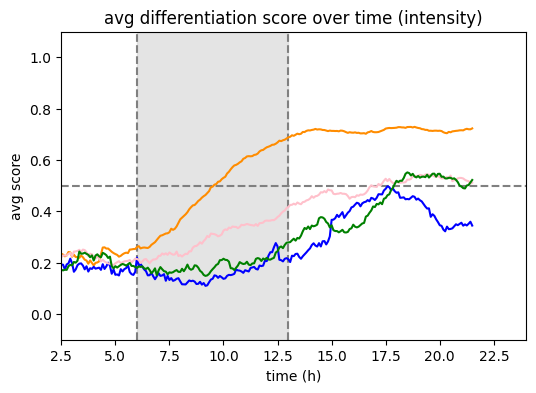

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

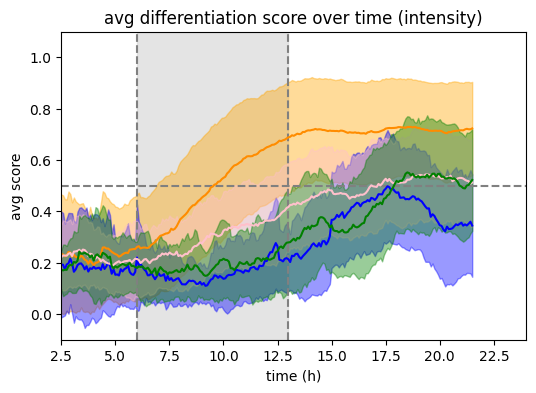

<Figure size 640x480 with 0 Axes>

In [14]:
utils.plot_avg_conf(data_2_3_test, "intensity", path=fig_dir_path + "avg diff over time train (1,5) test (2, 3, 6, 8) inensity", plot_std=False, time=(6,13), xlim=(2.5, 24))
utils.plot_avg_conf(data_2_3_test, "intensity", path=fig_dir_path + "avg diff over time train (1,5) test (2, 3, 6, 8) inensity (std)", plot_std=True, time=(6,13), xlim=(2.5, 24))